Part 01

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('dark_background')


df = pd.read_csv("2021 New Coder Survey.csv", dtype={"8. About how many months have you been programming?":float, "9. Aside from university tuition, about how much money have you spent on learning to code so far (in US Dollars)?":float})

In [39]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
#df.head()
#df.shape
#df.dtypes


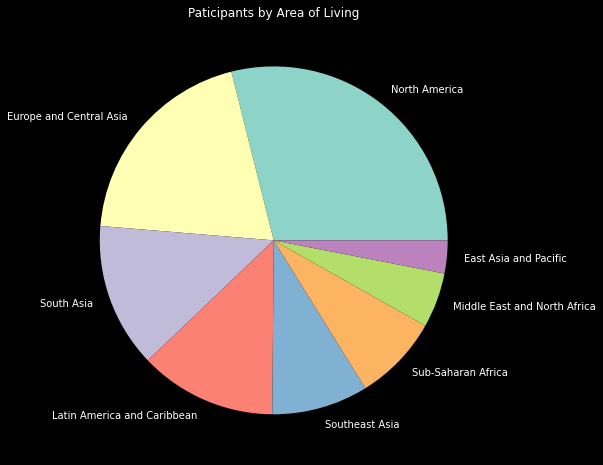

In [40]:

y= df["26. Which part of the world do you live in?"].value_counts()
fig = plt.figure(figsize=(16, 8))
plt.pie(y, labels = y.index)
plt.title("Paticipants by Area of Living")
plt.show()

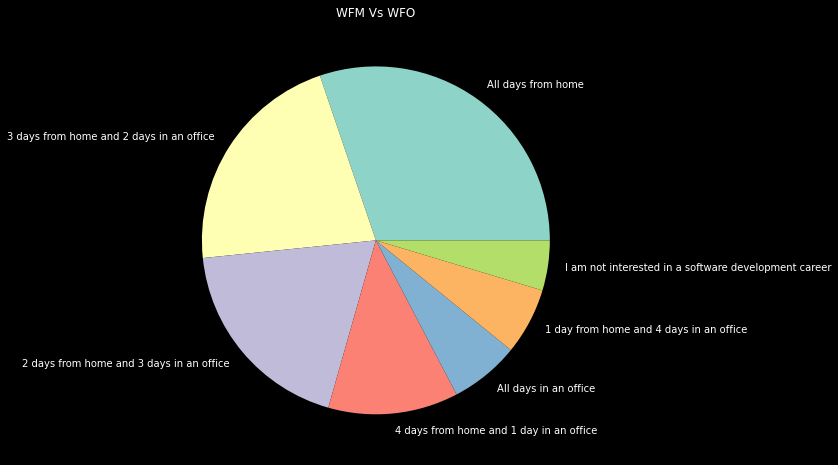

In [41]:
y = df["18. After the pandemic, how many days would you ideally like to work from home versus in an office each week?"].value_counts()

fig = plt.figure(figsize=(16, 8))
plt.pie(y, labels = y.index)
plt.title("WFM Vs WFO")
plt.show()